# 1. Frequency of Key Terms in Card Names and Descriptions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


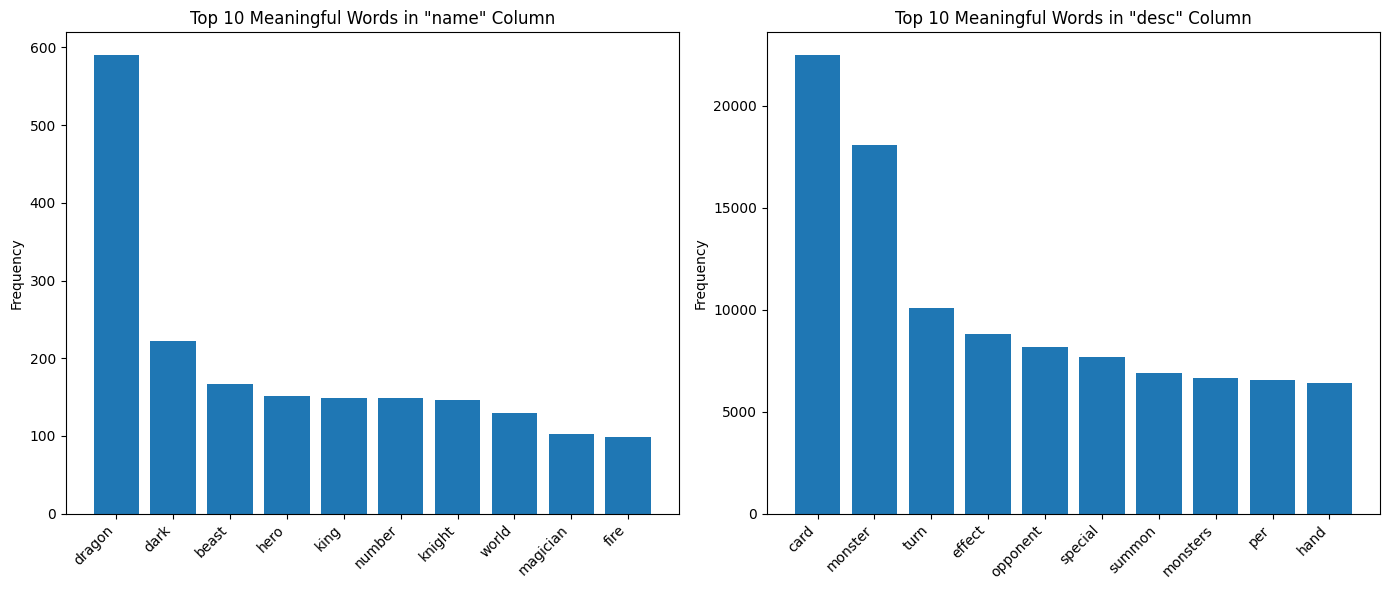

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

nltk.download("punkt")
nltk.download("stopwords")

data = pd.read_csv("C:/Users/wonny/Downloads/card_database.csv")

# Get the list of stopwords from NLTK, and extend it with custom words that are not meaningful
custom_stopwords = set(stopwords.words("english")) | {"1", ".", ","}


# Function to count meaningful words, excluding stopwords and digits
def count_meaningful_words(column):
    word_count = Counter()
    for text in column:
        words = word_tokenize(text.lower())  # Tokenize and convert to lower case
        filtered_words = [
            word for word in words if word not in custom_stopwords and word.isalpha()
        ]
        for word in filtered_words:
            word_count[word] += 1
    return word_count


# Count meaningful words in 'name' and 'desc' columns
meaningful_name_word_count = count_meaningful_words(data["name"])
meaningful_desc_word_count = count_meaningful_words(data["desc"])

# Most common meaningful words in 'name' and 'desc' columns
top_meaningful_name_words = meaningful_name_word_count.most_common(10)
top_meaningful_desc_words = meaningful_desc_word_count.most_common(10)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Top meaningful words in 'name'
names, name_counts = zip(*top_meaningful_name_words)
ax1.bar(names, name_counts)
ax1.set_title('Top 10 Meaningful Words in "name" Column')
ax1.set_ylabel("Frequency")
ax1.set_xticklabels(names, rotation=45, ha="right")

# Top meaningful words in 'desc'
descs, desc_counts = zip(*top_meaningful_desc_words)
ax2.bar(descs, desc_counts)
ax2.set_title('Top 10 Meaningful Words in "desc" Column')
ax2.set_ylabel("Frequency")
ax2.set_xticklabels(descs, rotation=45, ha="right")

plt.tight_layout()
plt.show()

# 2. Detailed Data Analysis: Text Processing and Attribute Distribution in Card Database


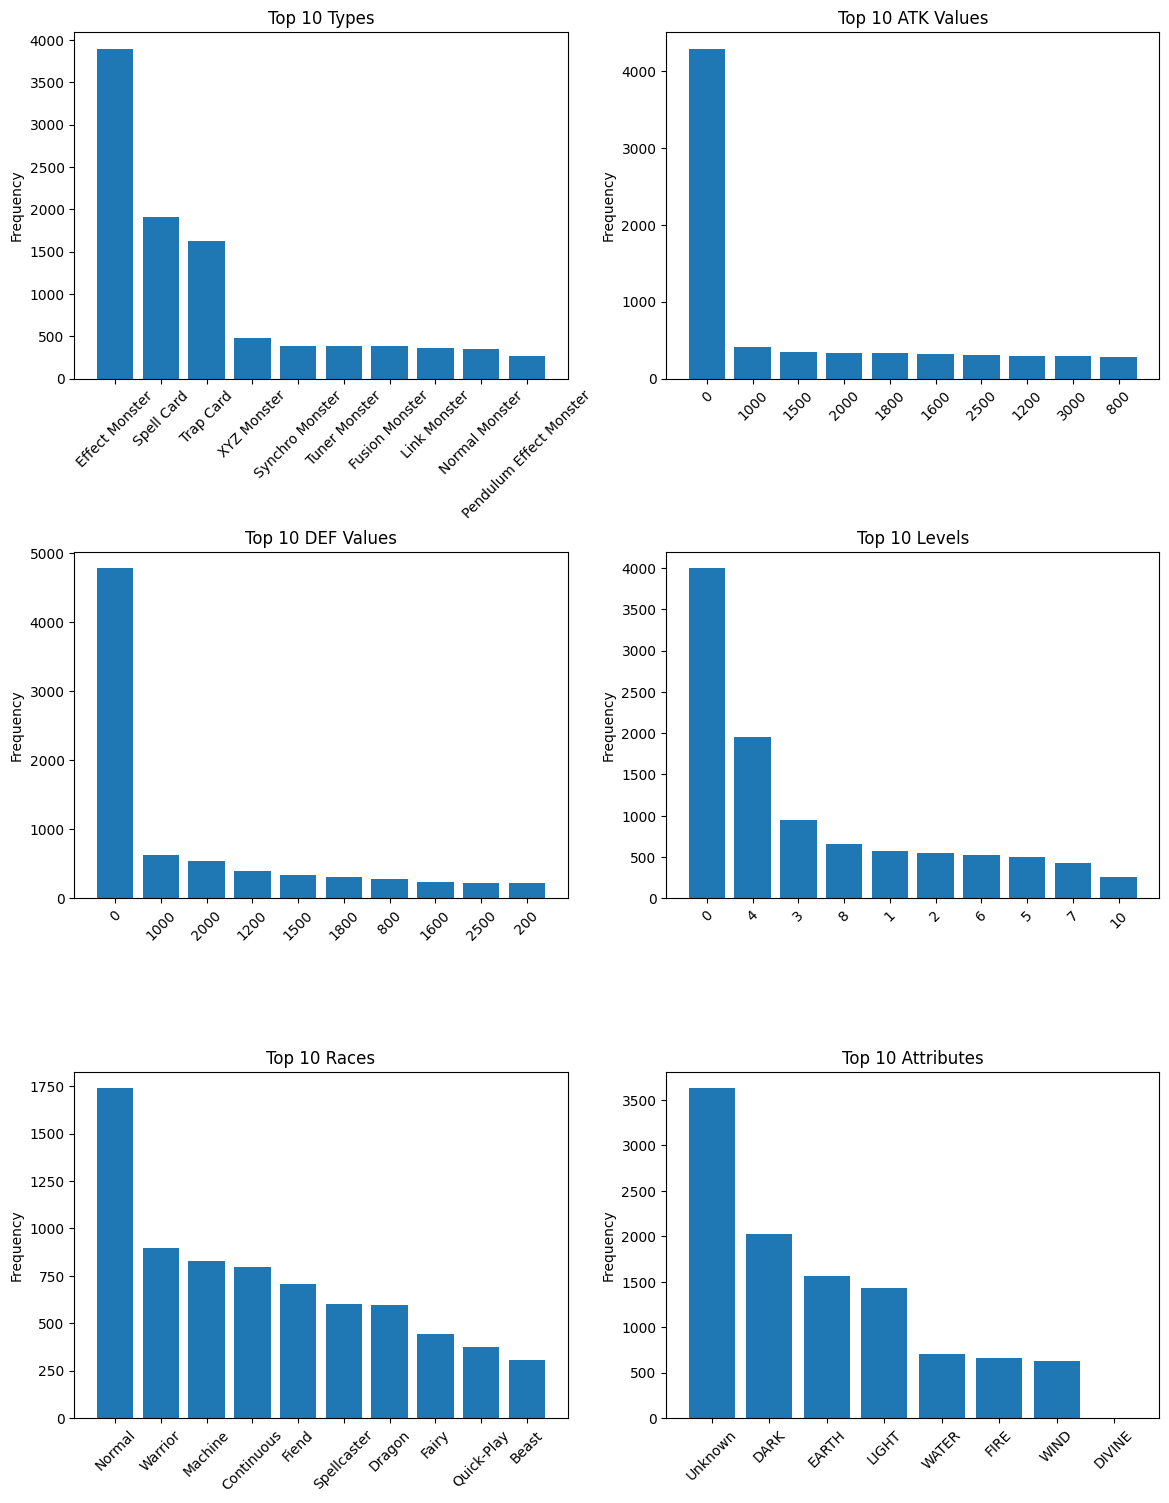

In [2]:
# Function to count meaningful words, excluding manual stopwords and digits
def count_meaningful_words(column):
    manual_stopwords = {
        "the",
        "of",
        "and",
        "a",
        "to",
        "in",
        "is",
        "you",
        "that",
        "it",
        "he",
        "was",
        "for",
        "on",
        "are",
        "as",
        "with",
        "his",
        "they",
        "I",
        "at",
        "be",
        "this",
        "have",
        "from",
        "or",
        "1",
        ".",
        ",",
    }
    word_count = Counter()
    for text in column:
        words = text.split()  # Splitting by space
        filtered_words = [
            word.lower()
            for word in words
            if word.lower() not in manual_stopwords and word.isalpha()
        ]
        for word in filtered_words:
            word_count[word] += 1
    return word_count


# Count meaningful words in 'name' and 'desc' columns
meaningful_name_word_count = count_meaningful_words(data["name"])
meaningful_desc_word_count = count_meaningful_words(data["desc"])


# Function to count frequencies of values in a given column
def count_frequencies(column):
    return column.value_counts()


# Count frequencies for 'type', 'atk', 'def', 'level', 'race', 'attribute'
type_frequencies = count_frequencies(data["type"])
atk_frequencies = count_frequencies(data["atk"])
def_frequencies = count_frequencies(data["def"])
level_frequencies = count_frequencies(data["level"])
race_frequencies = count_frequencies(data["race"])
attribute_frequencies = count_frequencies(data["attribute"])

# Plotting the results
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.subplots_adjust(hspace=0.5)

# Type
axes[0, 0].bar(type_frequencies.index[:10], type_frequencies.values[:10])
axes[0, 0].set_title("Top 10 Types")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].tick_params(axis="x", rotation=45)

# ATK
axes[0, 1].bar(atk_frequencies.index[:10].astype(str), atk_frequencies.values[:10])
axes[0, 1].set_title("Top 10 ATK Values")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].tick_params(axis="x", rotation=45)

# DEF
axes[1, 0].bar(def_frequencies.index[:10].astype(str), def_frequencies.values[:10])
axes[1, 0].set_title("Top 10 DEF Values")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].tick_params(axis="x", rotation=45)

# Level
axes[1, 1].bar(level_frequencies.index[:10].astype(str), level_frequencies.values[:10])
axes[1, 1].set_title("Top 10 Levels")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].tick_params(axis="x", rotation=45)

# Race
axes[2, 0].bar(race_frequencies.index[:10], race_frequencies.values[:10])
axes[2, 0].set_title("Top 10 Races")
axes[2, 0].set_ylabel("Frequency")
axes[2, 0].tick_params(axis="x", rotation=45)

# Attribute
axes[2, 1].bar(attribute_frequencies.index[:10], attribute_frequencies.values[:10])
axes[2, 1].set_title("Top 10 Attributes")
axes[2, 1].set_ylabel("Frequency")
axes[2, 1].tick_params(axis="x", rotation=45)

plt.show()

# 3. Uncovering Themes with LDA Topic Modeling 

In [3]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

nltk.download("wordnet")


# Define preprocessing function
def preprocess(text):
    # Remove punctuation
    text = "".join([ch for ch in text if ch not in string.punctuation])
    # Tokenization
    tokens = text.lower().split()
    # Remove stopwords and short words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 3]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens


# Preprocess all descriptions
processed_desc = list(map(preprocess, data["desc"]))

# Create a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(processed_desc)
corpus = [dictionary.doc2bow(text) for text in processed_desc]

# Build the LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha="auto",
    per_word_topics=True,
)

# Print the topics
lda_topics = lda_model.print_topics(num_words=5)
lda_topics

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(0,
  '0.240*"material" + 0.088*"pendulum" + 0.075*"link" + 0.055*"fusion" + 0.054*"used"'),
 (1,
  '0.176*"equipped" + 0.169*"equip" + 0.088*"type" + 0.047*"warrior" + 0.047*"atkdef"'),
 (2,
  '0.242*"spell" + 0.144*"zone" + 0.124*"world" + 0.044*"legacy" + 0.027*"toon"'),
 (3,
  '0.124*"point" + 0.097*"instead" + 0.095*"would" + 0.086*"side" + 0.058*"life"'),
 (4,
  '0.169*"battle" + 0.129*"damage" + 0.125*"attack" + 0.087*"position" + 0.064*"defense"'),
 (5,
  '0.092*"facedown" + 0.071*"ritual" + 0.070*"calculation" + 0.066*"whose" + 0.052*"flip"'),
 (6,
  '0.125*"monster" + 0.120*"card" + 0.054*"effect" + 0.048*"turn" + 0.040*"control"'),
 (7,
  '0.131*"standby" + 0.121*"select" + 0.062*"worm" + 0.059*"least" + 0.049*"barrier"'),
 (8,
  '0.471*"synchro" + 0.061*"zing" + 0.061*"yang" + 0.028*"beasttype" + 0.021*"speedroid"'),
 (9,
  '0.103*"dragon" + 0.101*"player" + 0.075*"token" + 0.057*"dark" + 0.035*"earth"')]

- **Topic 0: Material and Summoning Mechanics**
  - Keywords: `material`, `pendulum`, `link`, `fusion`, `used`
  - Description: This topic seems to involve various summoning mechanics, particularly focusing on materials required for different types of special summons, including Pendulum, Link, and Fusion monsters.

- **Topic 1: Equip and Enhancement Mechanics**
  - Keywords: `equipped`, `equip`, `type`, `warrior`, `atkdef`
  - Description: Discusses equipment cards and their effects, which enhance warrior-type monsters or modify their attack and defense stats.

- **Topic 2: Spell Cards and Their Strategic Zones**
  - Keywords: `spell`, `zone`, `world`, `legacy`, `toon`
  - Description: This topic is centered around spell cards and their interactions with specific zones on the field, referencing legacy and toon cards which are subsets of spell strategies.

- **Topic 3: Game Mechanics and Life Points**
  - Keywords: `point`, `instead`, `would`, `side`, `life`
  - Description: Focuses on the game's point systems, particularly how life points are managed and strategic decisions that might affect them.

- **Topic 4: Battle Dynamics and Positioning**
  - Keywords: `battle`, `damage`, `attack`, `position`, `defense`
  - Description: Concerns the dynamics of battle, including attack strategies, damage calculation, and monster positioning for defense.

- **Topic 5: Hidden Mechanics and Ritual Summons**
  - Keywords: `facedown`, `ritual`, `calculation`, `whose`, `flip`
  - Description: This topic likely covers hidden or face-down card strategies, including the mechanics of ritual summoning and calculations based on card states.

- **Topic 6: Monster Control and Card Effects**
  - Keywords: `monster`, `card`, `effect`, `turn`, `control`
  - Description: Discusses controlling monsters through card effects that activate per turn or based on certain conditions.

- **Topic 7: Selection and Defense Strategies**
  - Keywords: `standby`, `select`, `worm`, `least`, `barrier`
  - Description: Focuses on selecting cards during the standby phase and strategies involving defensive barriers, possibly related to Worm-type monsters.

- **Topic 8: Synchro Summoning and Speed Strategies**
  - Keywords: `synchro`, `zing`, `yang`, `beasttype`, `speedroid`
  - Description: Centralizes on Synchro summoning techniques, specifically involving the Yin Yang or Speedroid archetypes.

- **Topic 9: Player Interaction and Elemental Tactics**
  - Keywords: `dragon`, `player`, `token`, `dark`, `earth`
  - Description: Discusses player interactions involving dragon-type monsters and tactics using tokens and elemental attributes like Dark and Earth.

# 4. Part-of-Speech Tagging and Frequency Analysis in Card 'Description' 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


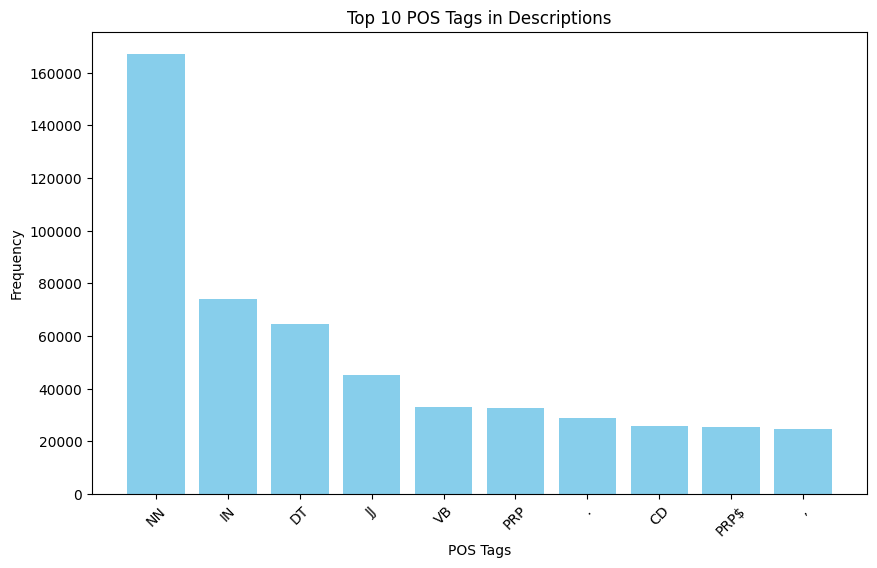

In [4]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Make sure to download the necessary NLTK resources
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")


# Function to apply POS tagging
def pos_tagging(text):
    tokens = word_tokenize(text.lower())
    return pos_tag(tokens)


# Apply POS tagging to each description
tagged_descriptions = data["desc"].apply(pos_tagging)

# Flatten the list of all tags
all_tags = [tag for sublist in tagged_descriptions for _, tag in sublist]

# Count the frequency of each POS tag
pos_counts = Counter(all_tags)

# Get the most common POS tags
top_tags = pos_counts.most_common(10)
tags, counts = zip(
    *top_tags
)  # This will create two tuples: one for tags and one for their counts

# Plotting the most common POS tags
plt.figure(figsize=(10, 6))
plt.bar(tags, counts, color="skyblue")
plt.title("Top 10 POS Tags in Descriptions")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

The `desc` column in the dataset predominantly comprises various parts of speech, with nouns (NN), prepositions/subordinating conjunctions (IN), determiners (DT), and adjectives (JJ) appearing most frequently. This distribution suggests a descriptive nature of the text, likely aimed at explaining specific objects or situations. The most common POS tags and their occurrences are as follows:

- **NN (Noun, singular or mass)**: 167,148 occurrences
- **IN (Preposition or subordinating conjunction)**: 73,886 occurrences
- **DT (Determiner)**: 64,588 occurrences
- **JJ (Adjective)**: 45,135 occurrences
- **VB (Verb, base form)**: 32,838 occurrences
- **PRP (Personal pronoun)**: 32,736 occurrences
- **. (Period, dot or full stop)**: 28,742 occurrences
- **CD (Cardinal number)**: 25,964 occurrences
- **PRP$ (Possessive pronoun)**: 25,583 occurrences
- **, (Comma)**: 24,841 occurrences

# 5. Sentiment Distribution Analysis of Card Description Texts

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                desc  sentiment
0  During each of your Standby Phases, put 1 A-Co...     0.0000
1  Each time an A-Counter(s) is removed from play...    -0.2023
2  Target 1 face-up monster on the field; send 1 ...    -0.6486
3  Select 1 face-up "Alien" monster you control. ...    -0.5423
4  While this card is equipped to a monster: You ...    -0.5319


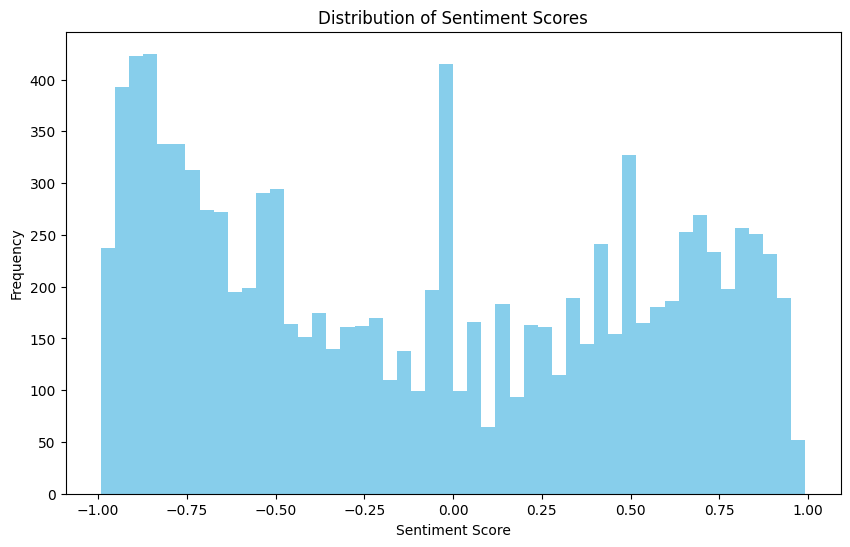

In [6]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Make sure to download the necessary NLTK resources
nltk.download("vader_lexicon")

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each description in the 'desc' column
data["sentiment"] = data["desc"].apply(lambda x: sia.polarity_scores(x)["compound"])

# You can now examine the sentiment scores, for example:
print(data[["desc", "sentiment"]].head())

# Optionally, plot the distribution of sentiment scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data["sentiment"], bins=50, color="skyblue")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

> The histogram displaying sentiment scores for our dataset's descriptions reveals a bimodal distribution, indicating a tendency for the descriptions to be strongly positive or negative with fewer neutral tones. Peaks near the extremes (-1 and +1) suggest significant occurrences of both highly negative and highly positive sentiments, respectively. This pattern implies that the text within the `desc` column varies widely in emotional content, with significant clusters at both ends of the sentiment spectrum. 